In [1]:
# Import Libraries
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

In [2]:
# Read in the excel file 'randstad.xlsx' as a dataframe
randstad_network = pd.read_excel('City Network.xlsx')
# Show contents of the dataframe
randstad_network

,weight,0,b
0,42.4,Amsterdam,Utrecht
1,29.7,Leiden,Schiphol
2,20.5,Den Haag,Leiden
3,22.8,Woerden,Gouda
4,27.8,Utrecht,Woerden
5,24.0,Woerden,Alphen aan de rijn
6,10.9,Den Haag,Delft
7,27.4,Zaanstad,Amsterdam
8,23.3,Zaanstad,Haarlem
9,20.2,Haarlem,Schiphol


In [3]:
# Make a graph from the dataframe
Randstad_Graph=nx.from_pandas_edgelist(randstad_network, 0, 'b', ['weight'])

In [4]:
print(nx.nodes(Randstad_Graph))

['Amsterdam', 'Utrecht', 'Leiden', 'Schiphol', 'Den Haag', 'Woerden', 'Gouda', 'Alphen aan de rijn', 'Delft', 'Zaanstad', 'Haarlem', 'Almere', 'Hilversum', 'Zoetermeer', 'Amersfoort', 'Rotterdam', 'Vlaardingen', 'Spijkenisse', 'Dordrecht', 'Rotterdam ']


In [5]:
dsp = nx.shortest_path(Randstad_Graph, source='Amsterdam', target='Delft')
print(dsp)

['Amsterdam', 'Utrecht', 'Dordrecht', 'Rotterdam', 'Delft']


In [6]:
dspl = nx.shortest_path_length(Randstad_Graph, source='Amsterdam', target='Delft')
print(dspl)

4


In [7]:
dspl = nx.shortest_path_length(Randstad_Graph, source='Amsterdam', target='Delft',weight='weight')
print(dspl)

84.0


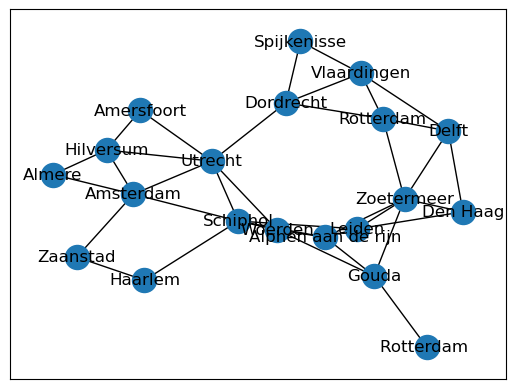

In [8]:
# Plot the graph
nx.draw_networkx(Randstad_Graph)

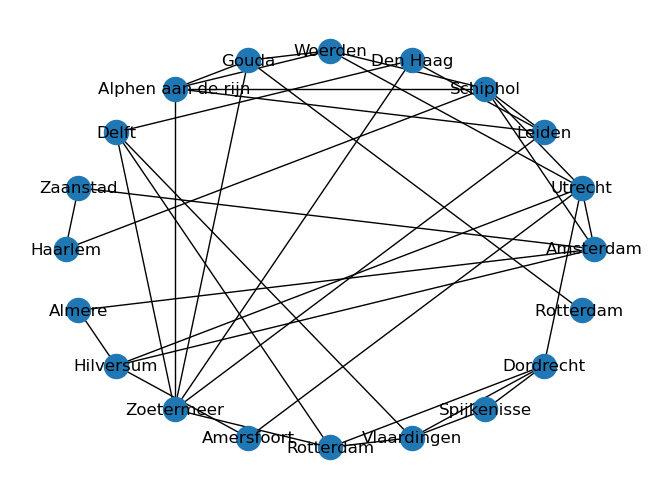

In [30]:
# Plot the graph, using a cicular layout
#nx.draw_circular(Randstad_Graph)
nx.draw_circular(Randstad_Graph, with_labels=True)

In [10]:
#Calculate the betweenness centrality, don't normalize
betweenness = nx.betweenness_centrality(Randstad_Graph,k=None,normalized=False)
betweenness

{'Amsterdam': 27.158333333333335,
 'Utrecht': 56.26904761904762,
 'Leiden': 15.371428571428572,
 'Schiphol': 45.9,
 'Den Haag': 2.2928571428571427,
 'Woerden': 16.485714285714284,
 'Gouda': 20.126190476190473,
 'Alphen aan de rijn': 12.954761904761904,
 'Delft': 7.266666666666666,
 'Zaanstad': 1.3333333333333333,
 'Haarlem': 4.008333333333333,
 'Almere': 0.0,
 'Hilversum': 5.619047619047619,
 'Zoetermeer': 26.05238095238095,
 'Amersfoort': 0.0,
 'Rotterdam': 11.45357142857143,
 'Vlaardingen': 8.110714285714284,
 'Spijkenisse': 0.0,
 'Dordrecht': 32.59761904761905,
 'Rotterdam ': 0.0}

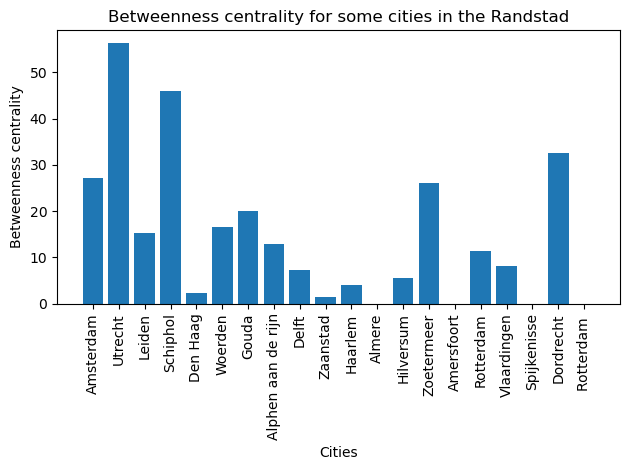

In [28]:
# Plot the values in a bar chart
plt.bar(range(len(betweenness)), betweenness.values(), align='center')
plt.xticks(range(len(betweenness)), list(betweenness.keys()))
plt.title("Betweenness centrality for some cities in the Randstad")
plt.xlabel("Cities")
plt.ylabel("Betweenness centrality")
plt.xticks(rotation=90)
plt.tight_layout()

In [12]:
#Calculate the weighted edge betweenness centrality, normalize
edge_betweenness_weigthed = nx.edge_betweenness_centrality(Randstad_Graph, 
                                                             k=None, 
                                                             normalized=True, 
                                                             weight='weight', 
                                                             seed=None)
edge_betweenness_weigthed

{('Amsterdam', 'Utrecht'): 0.021052631578947368,
 ('Amsterdam', 'Zaanstad'): 0.031578947368421054,
 ('Amsterdam', 'Schiphol'): 0.15263157894736842,
 ('Amsterdam', 'Almere'): 0.07368421052631578,
 ('Amsterdam', 'Hilversum'): 0.042105263157894736,
 ('Utrecht', 'Woerden'): 0.12631578947368421,
 ('Utrecht', 'Schiphol'): 0.021052631578947368,
 ('Utrecht', 'Hilversum'): 0.07368421052631578,
 ('Utrecht', 'Amersfoort'): 0.07894736842105263,
 ('Utrecht', 'Dordrecht'): 0.08421052631578947,
 ('Leiden', 'Schiphol'): 0.14210526315789473,
 ('Leiden', 'Den Haag'): 0.13157894736842105,
 ('Leiden', 'Alphen aan de rijn'): 0.021052631578947368,
 ('Leiden', 'Zoetermeer'): 0.02631578947368421,
 ('Schiphol', 'Haarlem'): 0.15789473684210525,
 ('Schiphol', 'Woerden'): 0.021052631578947368,
 ('Schiphol', 'Alphen aan de rijn'): 0.14210526315789473,
 ('Den Haag', 'Delft'): 0.12105263157894737,
 ('Den Haag', 'Zoetermeer'): 0.03684210526315789,
 ('Woerden', 'Gouda'): 0.11578947368421053,
 ('Woerden', 'Alphen aan d

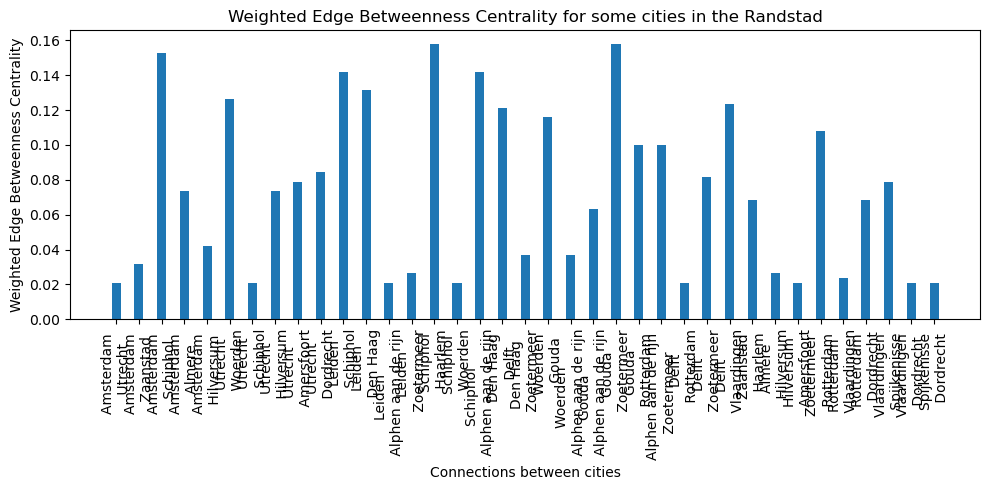

In [29]:
# Helper function for parsing the edge labels
def ppEdges (l):
    rl = []
    for i in range(len(l)):
        rl.append(str(l[i][0]) + ' \n ' + str(l[i][1]))
    return rl

# Plot the values in a bar chart
plt.figure(figsize=(10, 5))
plt.bar(range(len(edge_betweenness_weigthed)), edge_betweenness_weigthed.values(), width=0.4)
plt.xticks(range(len(edge_betweenness_weigthed)), ppEdges(list(edge_betweenness_weigthed.keys())))
plt.title("Weighted Edge Betweenness Centrality for some cities in the Randstad")
plt.xlabel("Connections between cities")
plt.ylabel("Weighted Edge Betweenness Centrality")
plt.xticks(rotation=90)
plt.tight_layout()

In [14]:
# first print all nodes/cities
list(nx.nodes(Randstad_Graph)) 

['Amsterdam',
 'Utrecht',
 'Leiden',
 'Schiphol',
 'Den Haag',
 'Woerden',
 'Gouda',
 'Alphen aan de rijn',
 'Delft',
 'Zaanstad',
 'Haarlem',
 'Almere',
 'Hilversum',
 'Zoetermeer',
 'Amersfoort',
 'Rotterdam',
 'Vlaardingen',
 'Spijkenisse',
 'Dordrecht',
 'Rotterdam ']

In [15]:
#print all edges/connections in the network
list (nx.edges(Randstad_Graph))

[('Amsterdam', 'Utrecht'),
 ('Amsterdam', 'Zaanstad'),
 ('Amsterdam', 'Schiphol'),
 ('Amsterdam', 'Almere'),
 ('Amsterdam', 'Hilversum'),
 ('Utrecht', 'Woerden'),
 ('Utrecht', 'Schiphol'),
 ('Utrecht', 'Hilversum'),
 ('Utrecht', 'Amersfoort'),
 ('Utrecht', 'Dordrecht'),
 ('Leiden', 'Schiphol'),
 ('Leiden', 'Den Haag'),
 ('Leiden', 'Alphen aan de rijn'),
 ('Leiden', 'Zoetermeer'),
 ('Schiphol', 'Haarlem'),
 ('Schiphol', 'Woerden'),
 ('Schiphol', 'Alphen aan de rijn'),
 ('Den Haag', 'Delft'),
 ('Den Haag', 'Zoetermeer'),
 ('Woerden', 'Gouda'),
 ('Woerden', 'Alphen aan de rijn'),
 ('Gouda', 'Alphen aan de rijn'),
 ('Gouda', 'Zoetermeer'),
 ('Gouda', 'Rotterdam '),
 ('Alphen aan de rijn', 'Zoetermeer'),
 ('Delft', 'Rotterdam'),
 ('Delft', 'Zoetermeer'),
 ('Delft', 'Vlaardingen'),
 ('Zaanstad', 'Haarlem'),
 ('Almere', 'Hilversum'),
 ('Hilversum', 'Amersfoort'),
 ('Zoetermeer', 'Rotterdam'),
 ('Rotterdam', 'Vlaardingen'),
 ('Rotterdam', 'Dordrecht'),
 ('Vlaardingen', 'Spijkenisse'),
 ('Vlaar

In [20]:
# print all the shortest paths in the network from each city
L = list(nx.all_pairs_dijkstra(Randstad_Graph))
print (L)

[('Amsterdam', ({'Amsterdam': 0, 'Schiphol': 20.8, 'Zaanstad': 27.4, 'Hilversum': 29.0, 'Almere': 32.3, 'Haarlem': 41.0, 'Utrecht': 42.4, 'Alphen aan de rijn': 45.1, 'Leiden': 52.6, 'Amersfoort': 55.9, 'Gouda': 63.3, 'Zoetermeer': 66.6, 'Woerden': 68.8, 'Den Haag': 73.1, 'Delft': 84.0, 'Rotterdam': 86.69999999999999, 'Rotterdam ': 87.1, 'Vlaardingen': 99.7, 'Dordrecht': 103.3, 'Spijkenisse': 114.7}, {'Amsterdam': ['Amsterdam'], 'Utrecht': ['Amsterdam', 'Utrecht'], 'Zaanstad': ['Amsterdam', 'Zaanstad'], 'Schiphol': ['Amsterdam', 'Schiphol'], 'Almere': ['Amsterdam', 'Almere'], 'Hilversum': ['Amsterdam', 'Hilversum'], 'Leiden': ['Amsterdam', 'Schiphol', 'Leiden'], 'Haarlem': ['Amsterdam', 'Schiphol', 'Haarlem'], 'Woerden': ['Amsterdam', 'Schiphol', 'Woerden'], 'Alphen aan de rijn': ['Amsterdam', 'Schiphol', 'Alphen aan de rijn'], 'Amersfoort': ['Amsterdam', 'Hilversum', 'Amersfoort'], 'Dordrecht': ['Amsterdam', 'Utrecht', 'Dordrecht'], 'Gouda': ['Amsterdam', 'Schiphol', 'Alphen aan de rij

In [22]:
#betweenness centrality (B for betweeness centrality) 
B = nx.betweenness_centrality(Randstad_Graph)
print (B)

{'Amsterdam': 0.1588206627680312, 'Utrecht': 0.3290587580061264, 'Leiden': 0.08989139515455305, 'Schiphol': 0.26842105263157895, 'Den Haag': 0.013408521303258144, 'Woerden': 0.09640768588137008, 'Gouda': 0.11769702032859924, 'Alphen aan de rijn': 0.07575884154831522, 'Delft': 0.042495126705653016, 'Zaanstad': 0.007797270955165692, 'Haarlem': 0.02344054580896686, 'Almere': 0.0, 'Hilversum': 0.0328599275967697, 'Zoetermeer': 0.1523531049846839, 'Amersfoort': 0.0, 'Rotterdam': 0.06697994987468672, 'Vlaardingen': 0.047431077694235574, 'Spijkenisse': 0.0, 'Dordrecht': 0.19062935115566693, 'Rotterdam ': 0.0}


In [23]:
#Degree centrality (D for Degree centrality) 
D = nx.degree_centrality(Randstad_Graph)
print (D)

{'Amsterdam': 0.2631578947368421, 'Utrecht': 0.3157894736842105, 'Leiden': 0.21052631578947367, 'Schiphol': 0.3157894736842105, 'Den Haag': 0.15789473684210525, 'Woerden': 0.21052631578947367, 'Gouda': 0.21052631578947367, 'Alphen aan de rijn': 0.2631578947368421, 'Delft': 0.21052631578947367, 'Zaanstad': 0.10526315789473684, 'Haarlem': 0.10526315789473684, 'Almere': 0.10526315789473684, 'Hilversum': 0.21052631578947367, 'Zoetermeer': 0.3157894736842105, 'Amersfoort': 0.10526315789473684, 'Rotterdam': 0.21052631578947367, 'Vlaardingen': 0.21052631578947367, 'Spijkenisse': 0.10526315789473684, 'Dordrecht': 0.21052631578947367, 'Rotterdam ': 0.05263157894736842}


In [24]:
#closeness centrality (C for closeness )
C = nx.closeness_centrality(Randstad_Graph)
print (C)

{'Amsterdam': 0.4418604651162791, 'Utrecht': 0.5277777777777778, 'Leiden': 0.4418604651162791, 'Schiphol': 0.5135135135135135, 'Den Haag': 0.38, 'Woerden': 0.4634146341463415, 'Gouda': 0.41304347826086957, 'Alphen aan de rijn': 0.4634146341463415, 'Delft': 0.36538461538461536, 'Zaanstad': 0.3220338983050847, 'Haarlem': 0.3584905660377358, 'Almere': 0.3220338983050847, 'Hilversum': 0.3877551020408163, 'Zoetermeer': 0.4318181818181818, 'Amersfoort': 0.36538461538461536, 'Rotterdam': 0.41304347826086957, 'Vlaardingen': 0.38, 'Spijkenisse': 0.3275862068965517, 'Dordrecht': 0.4418604651162791, 'Rotterdam ': 0.296875}


In [26]:
# Create a DataFrame to store centrality measures
df = pd.DataFrame({
    'Node': list(Randstad_Graph.nodes),
    'Betweenness Centrality': [B[node] for node in Randstad_Graph.nodes],
    'Degree Centrality': [D[node] for node in Randstad_Graph.nodes],
    'Closeness Centrality': [C[node] for node in Randstad_Graph.nodes]
})

# Display the DataFrame
print(df)

                  Node  Betweenness Centrality  Degree Centrality  \
0            Amsterdam                0.158821           0.263158   
1              Utrecht                0.329059           0.315789   
2               Leiden                0.089891           0.210526   
3             Schiphol                0.268421           0.315789   
4             Den Haag                0.013409           0.157895   
5              Woerden                0.096408           0.210526   
6                Gouda                0.117697           0.210526   
7   Alphen aan de rijn                0.075759           0.263158   
8                Delft                0.042495           0.210526   
9             Zaanstad                0.007797           0.105263   
10             Haarlem                0.023441           0.105263   
11              Almere                0.000000           0.105263   
12           Hilversum                0.032860           0.210526   
13          Zoetermeer            

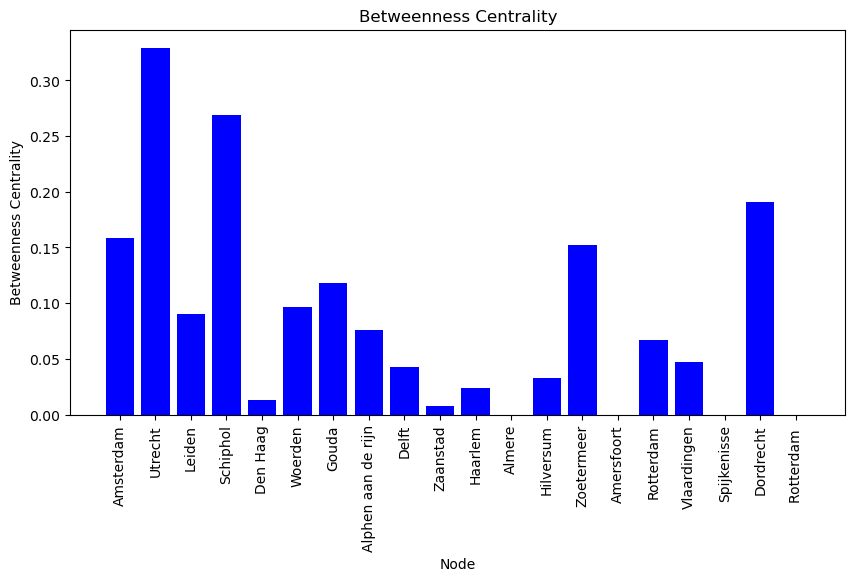

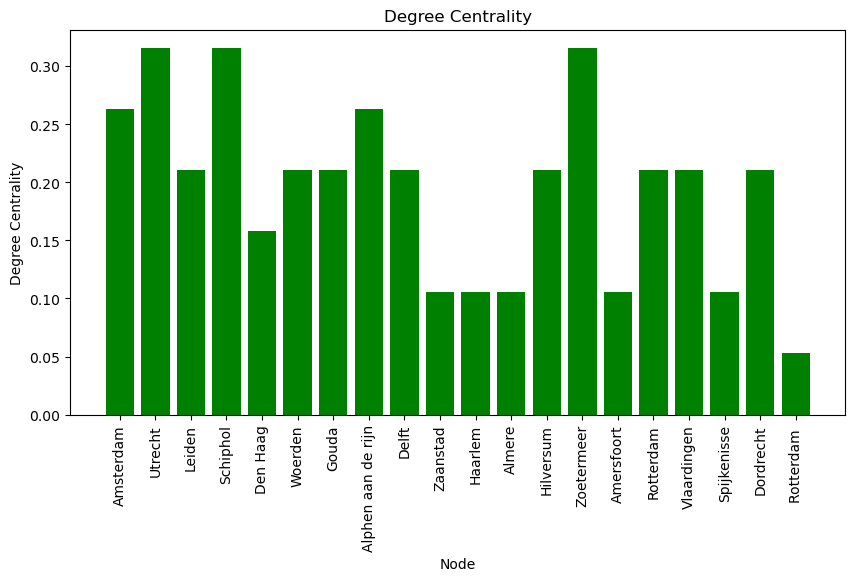

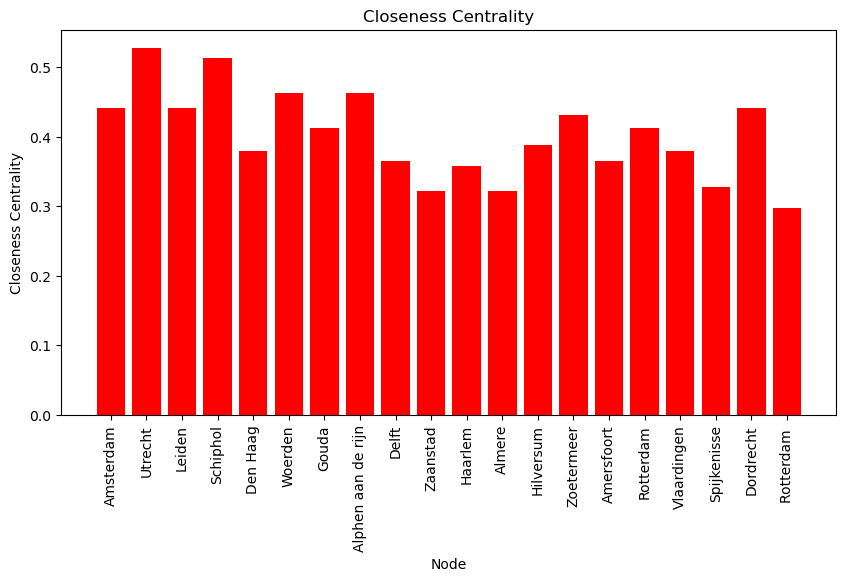

In [27]:
#plot 3 graphs to visualize the results in the dataframe and see which cities are most significant 
import matplotlib.pyplot as plt

# Plot betweenness centrality
plt.figure(figsize=(10, 5))
plt.bar(df['Node'], df['Betweenness Centrality'], color='blue')
plt.title('Betweenness Centrality')
plt.xlabel('Node')
plt.ylabel('Betweenness Centrality')
plt.xticks(rotation=90)
plt.show()

# Plot degree centrality
plt.figure(figsize=(10, 5))
plt.bar(df['Node'], df['Degree Centrality'], color='green')
plt.title('Degree Centrality')
plt.xlabel('Node')
plt.ylabel('Degree Centrality')
plt.xticks(rotation=90)
plt.show()

# Plot closeness centrality
plt.figure(figsize=(10, 5))
plt.bar(df['Node'], df['Closeness Centrality'], color='red')
plt.title('Closeness Centrality')
plt.xlabel('Node')
plt.ylabel('Closeness Centrality')
plt.xticks(rotation=90)
plt.show()

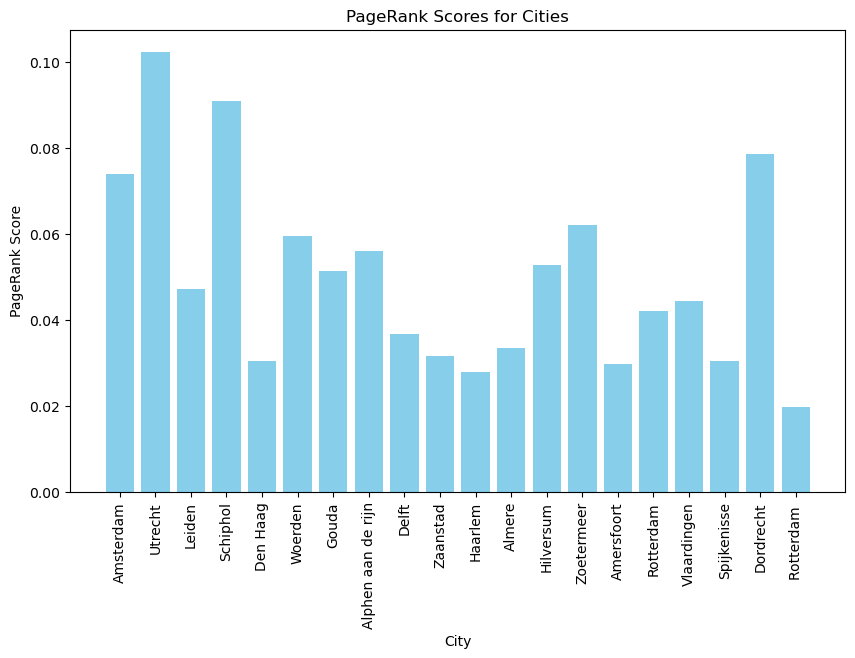

In [31]:
#calculate and plot the page ranks of the cities, to see their relative importance 
page_rank = nx.pagerank(Randstad_Graph)

# Plot PageRank scores
plt.figure(figsize=(10, 6))
plt.bar(page_rank.keys(), page_rank.values(), color='skyblue')
plt.title('PageRank Scores for Cities')
plt.xlabel('City')
plt.ylabel('PageRank Score')
plt.xticks(rotation=90)
plt.show()

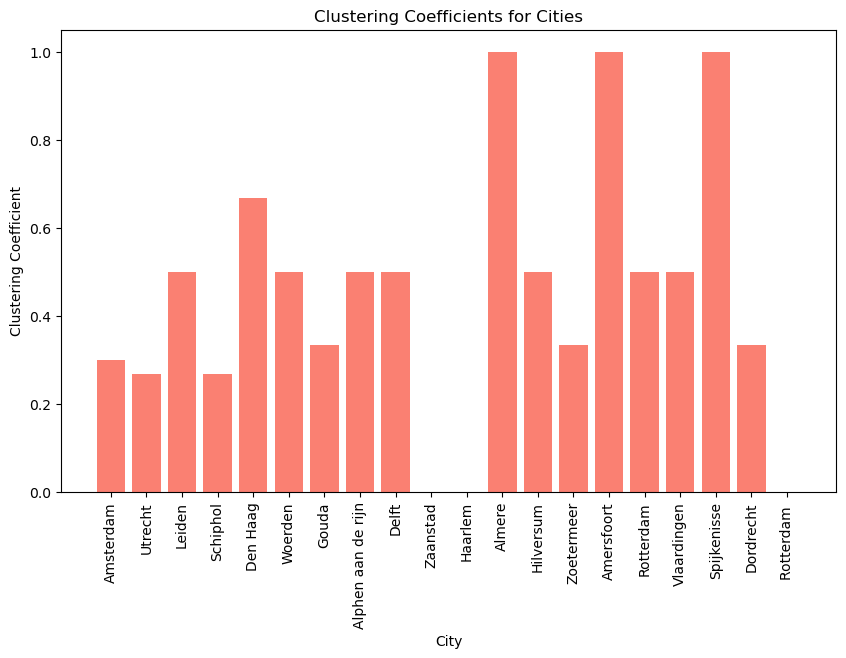

In [32]:
#Calculate clustering coefficients
clustering_coefficients = nx.clustering(Randstad_Graph)

# Plot clustering coefficients
plt.figure(figsize=(10, 6))
plt.bar(clustering_coefficients.keys(), clustering_coefficients.values(), color='salmon')
plt.title('Clustering Coefficients for Cities')
plt.xlabel('City')
plt.ylabel('Clustering Coefficient')
plt.xticks(rotation=90)
plt.show()

More information about Graph operations can be found in the NetworkX documentation:
https://networkx.github.io/documentation/stable/index.html

For example, this is the documentation on calculating the edge betweenness centrality:
https://networkx.github.io/documentation/stable/reference/algorithms/generated/networkx.algorithms.centrality.edge_betweenness_centrality.html#networkx.algorithms.centrality.edge_betweenness_centrality